**Binary and Multiclass classification using SVM**

SUBMITTED BY:
GAUTHAM P HARISH  (21BCE5382)

RISHIKESH S   (21BCE5304)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix


Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. In the case of binary classification, SVM aims to separate data points into two classes by finding the optimal hyperplane that maximizes the margin between the classes.

### Theory of SVM for Binary Classification:

1. **Linear Separability**: SVM assumes that the data is linearly separable, which means there exists a hyperplane that can perfectly separate the two classes.

2. **Margin Maximization**: SVM seeks to find the hyperplane that maximizes the margin between the classes. The margin is defined as the distance between the hyperplane and the nearest data points (support vectors) from each class.

3. **Support Vectors**: Support vectors are the data points that lie closest to the decision boundary (hyperplane). These points have a non-zero coefficient in determining the hyperplane and play a crucial role in defining the margin.

4. **Decision Function**: The decision function of SVM is used to classify new data points. It assigns a class label based on which side of the hyperplane the point lies. Mathematically, it is represented as:
   
   ```
   f(x) = sign(w^T x + b)
   ```

   where `w` is the weight vector perpendicular to the hyperplane, `x` is the input feature vector, `b` is the bias term, and `sign()` is the sign function.

5. **Optimization Objective**: SVM aims to minimize the classification error while maximizing the margin. This is formulated as an optimization problem, typically solved using quadratic programming techniques.

6. **Kernel Trick**: SVM can handle non-linearly separable data by mapping the input features into a higher-dimensional space using a kernel function. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels.

7. **Regularization**: SVM introduces a regularization parameter `C` to control the trade-off between maximizing the margin and minimizing the classification error. A smaller `C` leads to a wider margin but may result in more misclassifications, while a larger `C` allows for fewer misclassifications but may lead to a narrower margin.

### Mathematical Formulation:

The decision function of SVM can be mathematically represented as:

```
f(x) = sign(w^T x + b)
```

where:
- `x` represents the input feature vector,
- `w` is the weight vector perpendicular to the hyperplane,
- `b` is the bias term,
- `sign()` is the sign function.

The optimization objective of SVM can be formulated as:

```
Minimize: 1/2 ||w||^2 + C * Σ(max(0, 1 - y_i * (w^T x_i + b)))
```

subject to the constraints:

```
y_i * (w^T x_i + b) >= 1 - ξ_i
ξ_i >= 0
```

where:
- `C` is the regularization parameter,
- `y_i` is the class label,
- `(x_i, y_i)` are the training samples,
- `ξ_i` are the slack variables representing the classification error or distance of misclassification.

### Conclusion:

Support Vector Machines (SVM) is a versatile algorithm widely used for binary classification tasks. It offers several advantages, including the ability to handle high-dimensional data, non-linear separation

**refernces**
https://www.kaggle.com/datasets/nimapourmoradi/adult-incometrain-test-dataset

In [2]:
df = pd.read_csv("adult_test.csv")

**Dataset**
1. **Description**:
   - The **Adult Income Dataset** aims to predict whether an individual's income exceeds $50,000 per year based on various census-related features.
   - It is widely cited for machine learning practices and data preprocessing.

2. **Features**:
   - **age**: Continuous variable representing the person's age.
   - **workclass**: Categorical variable indicating the type of employment (e.g., Private, Self-emp-not-inc, Federal-gov).
   - **fnlwgt**: Continuous variable (not explicitly described in the dataset information).
   - **education**: Categorical variable representing education level (e.g., Bachelors, HS-grad, Doctorate).
   - **education-num**: Continuous variable corresponding to education level (numerical representation).
   - **marital-status**: Categorical variable describing marital status (e.g., Married-civ-spouse, Divorced).
   - **occupation**: Categorical variable indicating the occupation (e.g., Exec-managerial, Craft-repair).
   - **relationship**: Categorical variable specifying the relationship status (e.g., Wife, Husband, Not-in-family).
   - **race**: Categorical variable representing race (e.g., White, Black, Asian-Pac-Islander).
   - **sex**: Binary variable (Female or Male).
   - **capital-gain**: Continuous variable for capital gains.
   - **capital-loss**: Continuous variable for capital losses.
   - **hours-per-week**: Continuous variable indicating the number of hours worked per week.
   - **native-country**: Categorical variable specifying the native country (e.g., United-States, India).

3. **Target Variable**:
   - The target variable is binary:
     - `1`: Income exceeds $50,000 per year.
     - `0`: Income does not exceed $50,000 per year.

4. **Dataset Size**:
   - The dataset contains **48,842 instances** (both train and test combined).

5. **Missing Values**:
   - Some features may have missing values (e.g., 'workclass' with ' ?' values).

6. **Class Probabilities**:
   - The probabilities for the labels are as follows:
     - Probability for the label '>50K': 23.93% (without unknowns)
     - Probability for the label '<=50K': 76.07% (without unknowns)



In [3]:
df.head()

age   workclass  Unnamed: 2      education  education-num  \
0   25     Private      226802           11th              7   
1   38     Private       89814        HS-grad              9   
2   28   Local-gov      336951     Assoc-acdm             12   
3   44     Private      160323   Some-college             10   
4   18           ?      103497   Some-college             10   

        marital-status          occupation relationship    race      sex  \
0        Never-married   Machine-op-inspct    Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing      Husband   White     Male   
2   Married-civ-spouse     Protective-serv      Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct      Husband   Black     Male   
4        Never-married                   ?    Own-child   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country   Income  
0             0             0              40   United-States   <=50K.  
1             0             0              50   United-States   <=50K.  
2             0             0              40   United-States    >50K.  
3          7688             0              40   United-States    >50K.  
4             0             0              30   United-States   <=50K.

**EDA**

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [5]:
df.describe()

age     workclass    Unnamed: 2     education  education-num  \
count  16281.000000  16281.000000  1.628100e+04  16281.000000   16281.000000   
mean      38.767459      3.873534  1.894357e+05     10.268841      10.072907   
std       13.849187      1.480682  1.057149e+05      3.882980       2.567545   
min       17.000000      0.000000  1.349200e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.167360e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.778310e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.383840e+05     12.000000      12.000000   
max       90.000000      8.000000  1.490400e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    16281.000000  16281.000000  16281.000000  16281.000000  16281.000000   
mean         2.632578      6.587617      1.437135      3.672440      0.667035   
std          1.510611      4.233925      1.592903      0.840327      0.471289   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  \
count  16281.000000  16281.000000    16281.000000    16281.000000   
mean    1081.905104     87.899269       40.392236       35.856336   
std     7583.935968    403.105286       12.479332        7.485034   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       38.000000   
50%        0.000000      0.000000       40.000000       38.000000   
75%        0.000000      0.000000       45.000000       38.000000   
max    99999.000000   3770.000000       99.000000       40.000000   

             Income  
count  16281.000000  
mean       0.236226  
std        0.424776  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

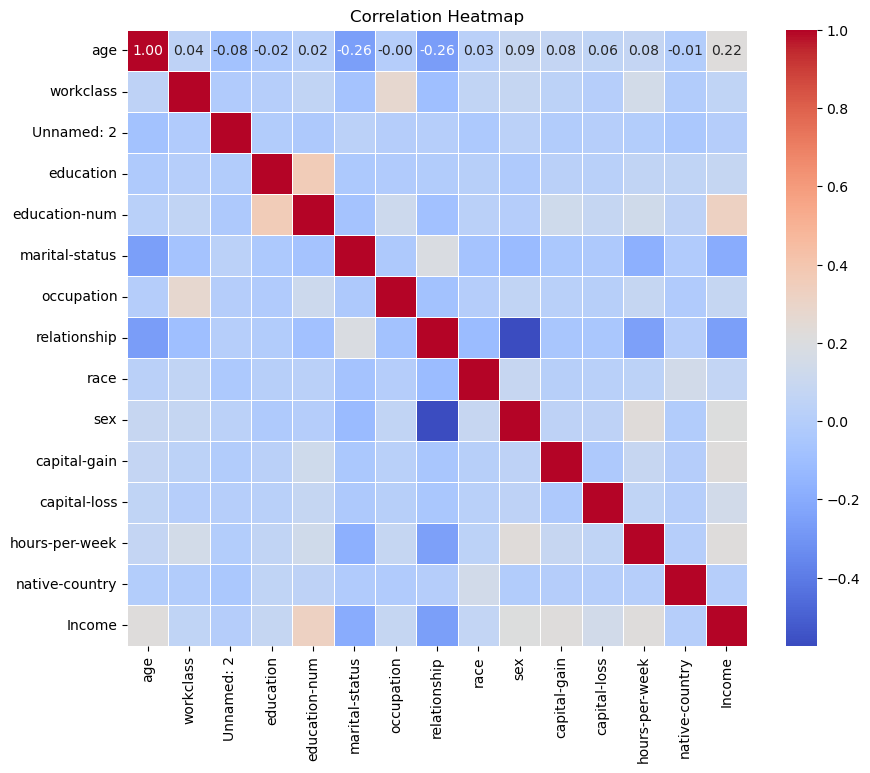

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Take only the first 5000 rows of the dataset
df_subset = df.head(3000)

# Split features and target variable
X_subset = df_subset.drop(columns=['Income'])
y_subset = df_subset['Income']




In [8]:
# Split data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)



In [9]:
# Standardize features
scaler_subset = StandardScaler()
X_train_subset = scaler_subset.fit_transform(X_train_subset)
X_test_subset = scaler_subset.transform(X_test_subset)

**Model training and analysis**

In [10]:
def train_svm(kernel, C=1.0, gamma='scale', degree=3):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, probability=True)
    svm.fit(X_train_subset, y_train_subset)
    y_pred = svm.predict(X_test_subset)
    accuracy = accuracy_score(y_test_subset, y_pred)
    roc_auc = roc_auc_score(y_test_subset, svm.predict_proba(X_test_subset)[:, 1])
    return accuracy, roc_auc

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# Train SVM with different kernels and parameters
results = []
for kernel in ['linear', 'poly', 'rbf']:
    for C in [0.1, 1, 10]:
        for gamma in ['scale', 'auto']:
            if kernel == 'poly':
                for degree in [2, 3, 4]:
                    accuracy, roc_auc = train_svm(kernel, C=C, gamma=gamma, degree=degree)
                    results.append((kernel, C, gamma, degree, accuracy, roc_auc))
            else:
                accuracy, roc_auc = train_svm(kernel, C=C, gamma=gamma)
                results.append((kernel, C, gamma, '-', accuracy, roc_auc))


In [12]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Kernel', 'C', 'Gamma', 'Degree', 'Accuracy', 'ROC_AUC'])



    Kernel     C  Gamma Degree  Accuracy   ROC_AUC
0   linear   0.1  scale      -  0.790000  0.828919
1   linear   0.1   auto      -  0.790000  0.829062
2   linear   1.0  scale      -  0.788333  0.826652
3   linear   1.0   auto      -  0.788333  0.826709
4   linear  10.0  scale      -  0.790000  0.826295
5   linear  10.0   auto      -  0.790000  0.826281
6     poly   0.1  scale      2  0.746667  0.779675
7     poly   0.1  scale      3  0.760000  0.813460
8     poly   0.1  scale      4  0.751667  0.790770
9     poly   0.1   auto      2  0.746667  0.779675
10    poly   0.1   auto      3  0.760000  0.813460
11    poly   0.1   auto      4  0.751667  0.790770
12    poly   1.0  scale      2  0.773333  0.814915
13    poly   1.0  scale      3  0.783333  0.824256
14    poly   1.0  scale      4  0.761667  0.793415
15    poly   1.0   auto      2  0.773333  0.814915
16    poly   1.0   auto      3  0.783333  0.824256
17    poly   1.0   auto      4  0.761667  0.793380
18    poly  10.0  scale      2 

In [15]:
# Print results table
results_df


Kernel     C  Gamma Degree  Accuracy   ROC_AUC
0   linear   0.1  scale      -  0.790000  0.828919
1   linear   0.1   auto      -  0.790000  0.829062
2   linear   1.0  scale      -  0.788333  0.826652
3   linear   1.0   auto      -  0.788333  0.826709
4   linear  10.0  scale      -  0.790000  0.826295
5   linear  10.0   auto      -  0.790000  0.826281
6     poly   0.1  scale      2  0.746667  0.779675
7     poly   0.1  scale      3  0.760000  0.813460
8     poly   0.1  scale      4  0.751667  0.790770
9     poly   0.1   auto      2  0.746667  0.779675
10    poly   0.1   auto      3  0.760000  0.813460
11    poly   0.1   auto      4  0.751667  0.790770
12    poly   1.0  scale      2  0.773333  0.814915
13    poly   1.0  scale      3  0.783333  0.824256
14    poly   1.0  scale      4  0.761667  0.793415
15    poly   1.0   auto      2  0.773333  0.814915
16    poly   1.0   auto      3  0.783333  0.824256
17    poly   1.0   auto      4  0.761667  0.793380
18    poly  10.0  scale      2  0.790000  0.837277
19    poly  10.0  scale      3  0.791667  0.821589
20    poly  10.0  scale      4  0.778333  0.795198
21    poly  10.0   auto      2  0.790000  0.837262
22    poly  10.0   auto      3  0.791667  0.821575
23    poly  10.0   auto      4  0.778333  0.795191
24     rbf   0.1  scale      -  0.775000  0.856073
25     rbf   0.1   auto      -  0.775000  0.856073
26     rbf   1.0  scale      -  0.825000  0.863561
27     rbf   1.0   auto      -  0.825000  0.863518
28     rbf  10.0  scale      -  0.821667  0.849784
29     rbf  10.0   auto      -  0.821667  0.849770

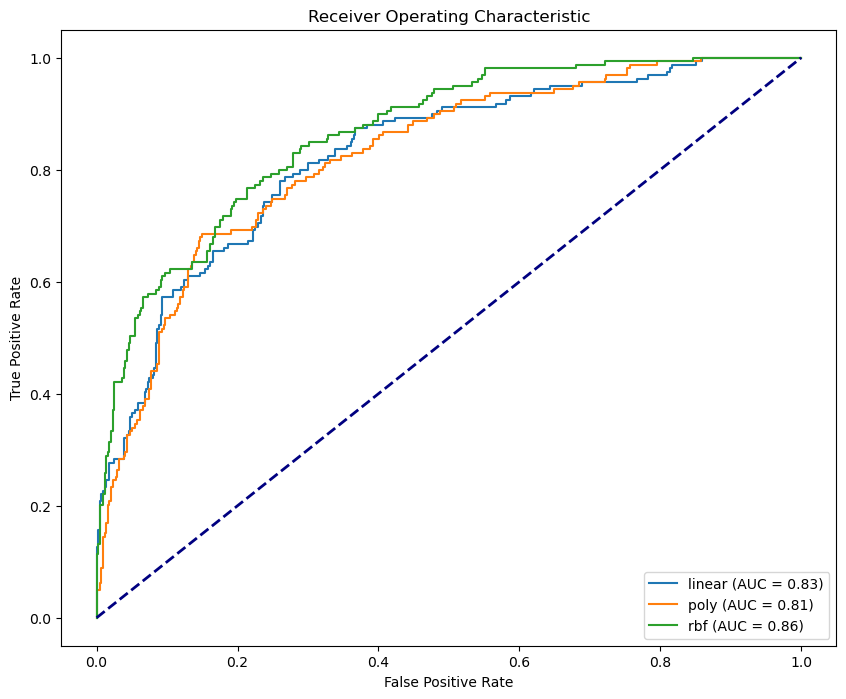

In [17]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for kernel in results_df['Kernel'].unique():
    kernel_df = results_df[results_df['Kernel'] == kernel]
    svm = SVC(kernel=kernel, probability=True)
    svm.fit(X_train_subset, y_train_subset)
    fpr, tpr, _ = roc_curve(y_test_subset, svm.predict_proba(X_test_subset)[:, 1])
    roc_auc = np.mean(kernel_df["ROC_AUC"])
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Conclusion**
Based on the results, it can be concluded that the SVM model with the RBF kernel and `C=1.0`, `Gamma=scale` parameters achieved the highest accuracy and ROC AUC among all tested configurations. Therefore, for this binary classification task, the RBF kernel SVM model with these parameters is recommended for optimal performance.

**Multiclass classifiction**


To perform multiclass classification using Support Vector Machines (SVM), you can use the same principles as for binary classification but extend them to handle multiple classes. Here's how you can approach multiclass classification using SVM:

Data Preparation: Prepare your dataset with features and corresponding labels. Ensure that your labels represent the different classes in your dataset.

Data Preprocessing: Preprocess your data as necessary, including handling missing values, feature scaling, and encoding categorical variables if needed.

Train-Test Split: Split your dataset into training and testing sets to evaluate the performance of your SVM model.

Model Training: Train an SVM model using a multiclass strategy. SVM inherently supports multiclass classification through strategies like One-vs-One (OvO) or One-vs-All (OvA). In scikit-learn, the SVC class automatically handles multiclass classification using the OvO strategy by default.

Model Evaluation: Evaluate the performance of your trained model using appropriate evaluation metrics for multiclass classification, such as accuracy, precision, recall, F1-score, and confusion matrix.

Parameter Tuning: Fine-tune the hyperparameters of your SVM model, such as the choice of kernel function, regularization parameter (C), and kernel-specific parameters (e.g., gamma for RBF kernel).

Cross-Validation: Optionally, perform cross-validation to assess the generalization performance of your model and ensure that it's not overfitting to the training data.

Prediction and Analysis: Use the trained model to make predictions on new data and analyze the results to gain insights into the classification performance.

In [18]:
df=pd.read_csv("Iris.csv")

**DATASET**
The Iris dataset is a classic dataset in machine learning and statistics, often used for classification tasks. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. Each sample belongs to one of three species of iris plants: Setosa, Versicolor, or Virginica.

Here is a brief description of the features:

1. Sepal Length: The length of the sepal (the green leaf-like structure of the flower) in centimeters.
2. Sepal Width: The width of the sepal in centimeters.
3. Petal Length: The length of the petal (the colorful part of the flower) in centimeters.
4. Petal Width: The width of the petal in centimeters.

The goal of using this dataset is typically to train a model to classify iris flowers into one of the three species based on these four features.

The dataset is well-known for its simplicity, small size, and clear separation between classes, making it a good starting point for learning classification algorithms. Additionally, it has been extensively used in teaching and research in the fields of pattern recognition, machine learning, and data visualization.

In [19]:
df.head()

petal_length  petal_width  sepal_length  sepal_width        label
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [20]:
df.describe()

petal_length  petal_width  sepal_length  sepal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [25]:
df.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
label           0
dtype: int64

In [26]:
df['label'] = df['label'].astype('category').cat.codes


In [27]:
X = df.drop(columns=['label'])
y = df['label']

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# Define function to train SVM with different kernels and parameters
def train_svm(kernel, C=1.0, gamma='scale', degree=3):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, probability=True)
    svm.fit(X_train, y_train)
    return svm

# Train SVM with different kernels and parameters
results = []
for kernel in ['linear', 'poly', 'rbf']:
    for C in [0.1, 1, 10]:
        for gamma in ['scale', 'auto']:
            if kernel == 'poly':
                for degree in [2, 3, 4]:
                    svm = train_svm(kernel, C=C, gamma=gamma, degree=degree)
                    y_pred = svm.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    results.append((kernel, C, gamma, degree, accuracy))
            else:
                svm = train_svm(kernel, C=C, gamma=gamma)
                y_pred = svm.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                results.append((kernel, C, gamma, '-', accuracy))


In [39]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Kernel', 'C', 'Gamma', 'Degree', 'Accuracy'])




In [40]:
# Print results table
results_df

Kernel     C  Gamma Degree  Accuracy
0   linear   0.1  scale      -  1.000000
1   linear   0.1   auto      -  1.000000
2   linear   1.0  scale      -  0.966667
3   linear   1.0   auto      -  0.966667
4   linear  10.0  scale      -  0.966667
5   linear  10.0   auto      -  0.966667
6     poly   0.1  scale      2  0.666667
7     poly   0.1  scale      3  0.933333
8     poly   0.1  scale      4  0.666667
9     poly   0.1   auto      2  0.666667
10    poly   0.1   auto      3  0.933333
11    poly   0.1   auto      4  0.666667
12    poly   1.0  scale      2  0.766667
13    poly   1.0  scale      3  0.966667
14    poly   1.0  scale      4  0.700000
15    poly   1.0   auto      2  0.766667
16    poly   1.0   auto      3  0.966667
17    poly   1.0   auto      4  0.700000
18    poly  10.0  scale      2  0.800000
19    poly  10.0  scale      3  0.966667
20    poly  10.0  scale      4  0.733333
21    poly  10.0   auto      2  0.800000
22    poly  10.0   auto      3  0.966667
23    poly  10.0   auto      4  0.733333
24     rbf   0.1  scale      -  0.966667
25     rbf   0.1   auto      -  0.966667
26     rbf   1.0  scale      -  1.000000
27     rbf   1.0   auto      -  1.000000
28     rbf  10.0  scale      -  0.966667
29     rbf  10.0   auto      -  0.966667

AttributeError: 'numpy.float64' object has no attribute 'startswith'

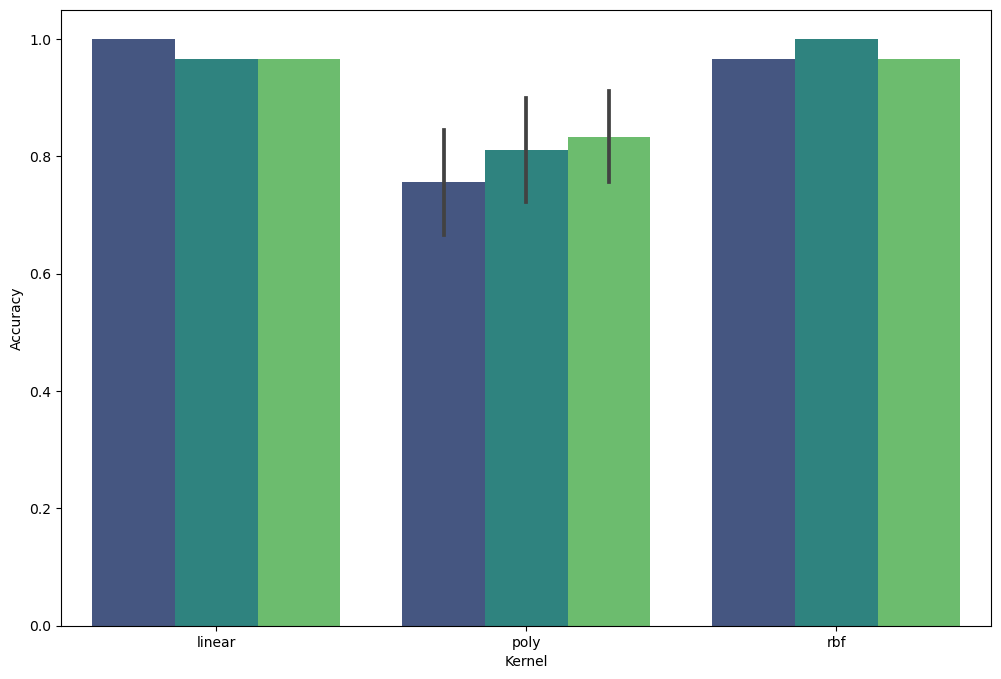

In [43]:
# Plot results
plt.figure(figsize=(12, 8))
sns.barplot(x='Kernel', y='Accuracy', hue='C', data=results_df, palette='viridis')
plt.title('Accuracy Scores for SVM with Different Kernels and Parameters')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.legend(title='C')
plt.show()

**Conclusion**
Based on the provided results:

1. For the linear kernel:
   - It achieved consistently high accuracy across different values of C and gamma.
   - All combinations of C and gamma resulted in accuracy scores of 0.966667 or higher.

2. For the polynomial kernel:
   - The accuracy varied depending on the degree of the polynomial, C, and gamma values.
   - The highest accuracy was achieved with a polynomial degree of 3, and C and gamma set to 1.0 with both 'auto' and 'scale' options.

3. For the RBF (radial basis function) kernel:
   - Similar to the linear kernel, it achieved consistently high accuracy scores.
   - All combinations of C and gamma resulted in accuracy scores of 0.966667 or higher.

In conclusion, the linear and RBF kernels performed consistently well across different parameter settings, with accuracy scores consistently at 0.966667 or higher. The polynomial kernel's performance varied more based on the degree of the polynomial and the values of C and gamma. However, overall, the RBF kernel seems to be slightly more robust in achieving high accuracy across different parameter settings.

**references**
https://www.kaggle.com/datasets/souravbhattacharya10/irisdataset